In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

%matplotlib inline

In [2]:
DATA = pd.read_csv('./data/preprocessed_automobile_data.csv')

In [3]:
DATA

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mps,price,normalized-losses
0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0,164.0
1,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0,164.0
2,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0,158.0
3,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0,158.0
4,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0,192.0
5,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16925.0,192.0
6,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,20970.0,188.0
7,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121.0,4250.0,21,28,21105.0,188.0
8,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151.0,121.0
9,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,6295.0,98.0


### Dataset Summary(continuous value only)

In [31]:
DATA.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mps,price,normalized-losses
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,98.235625,172.319375,65.596250,53.878750,2459.450000,119.093750,3.298438,3.237312,10.145125,95.875000,5116.250000,26.506250,32.068750,11427.681250,121.300000
std,5.163763,11.548860,1.946999,2.276608,480.897834,30.411186,0.267348,0.294210,3.882507,30.625708,465.290536,6.081208,6.440948,5863.789011,35.602417
min,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000,65.000000
25%,94.500000,165.525000,64.000000,52.000000,2073.250000,97.000000,3.050000,3.107500,8.700000,69.000000,4800.000000,23.000000,28.000000,7383.500000,94.000000
50%,96.900000,172.200000,65.400000,54.100000,2338.500000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9164.000000,114.000000
75%,100.600000,177.800000,66.500000,55.500000,2808.750000,134.500000,3.550000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000,148.000000
max,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000,256.000000


### Scatter plot each columns have continuous value

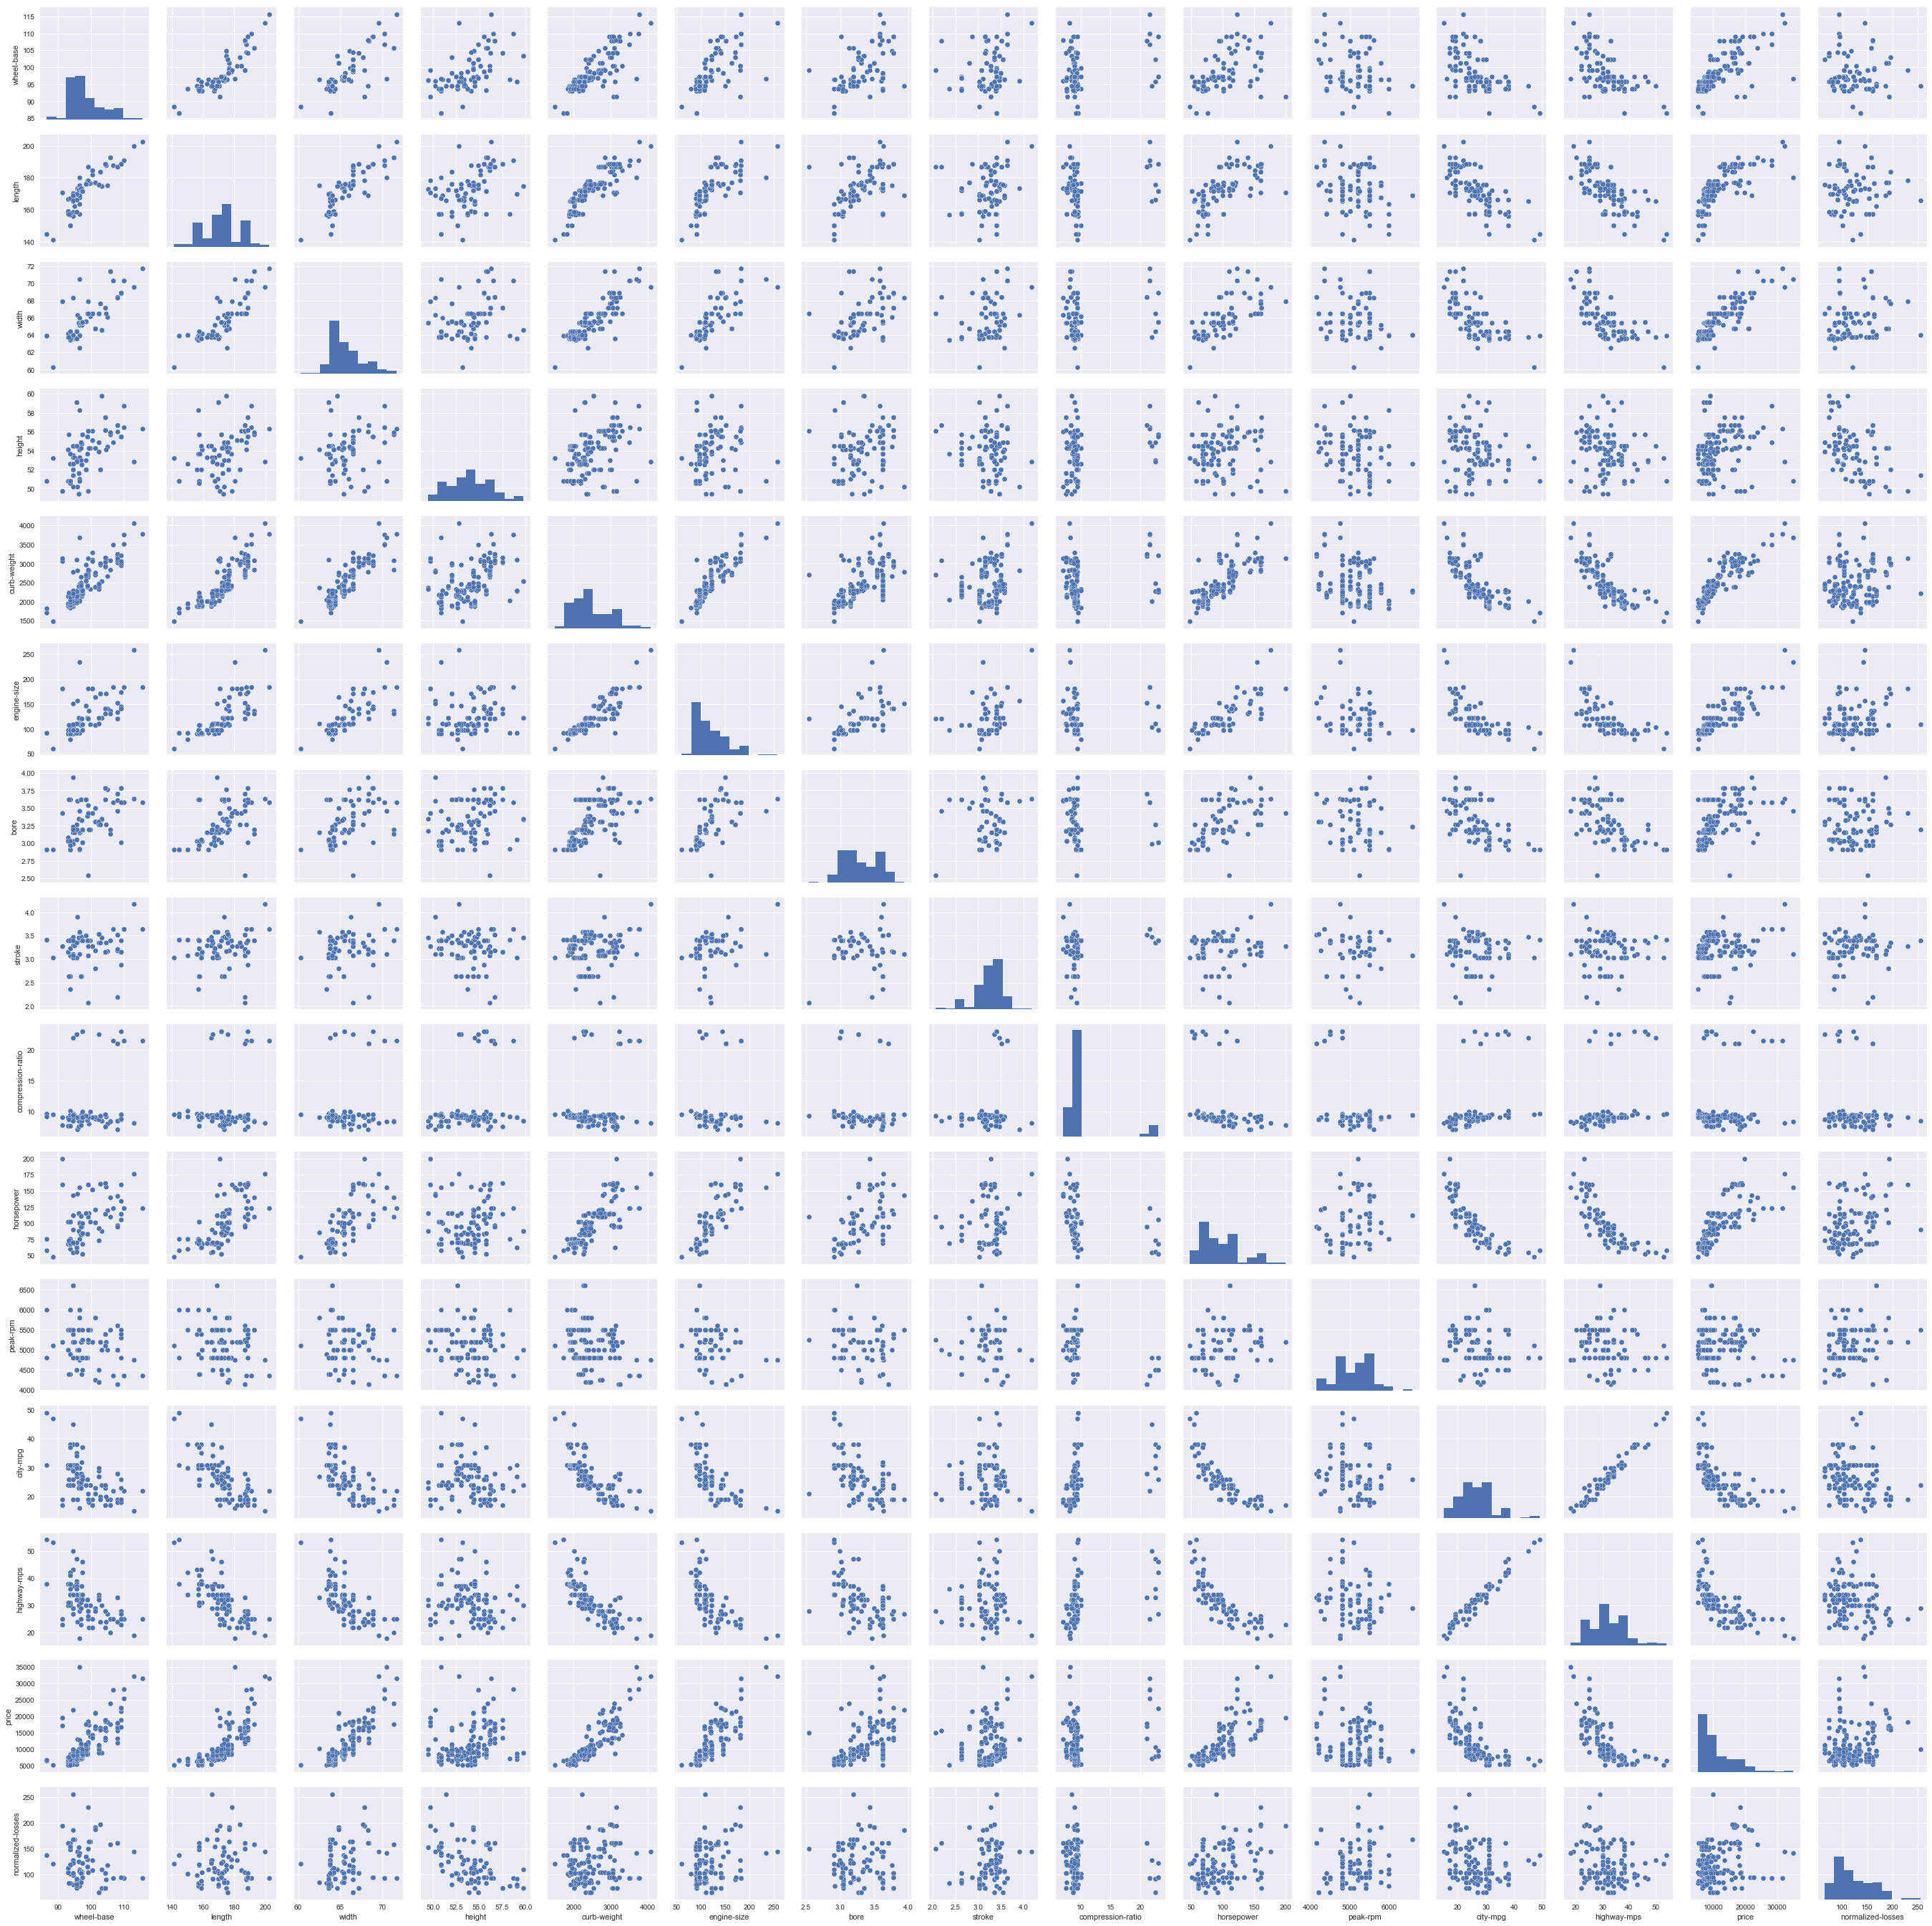

In [4]:
sns.pairplot(DATA)

### correlation of 'normalized-losses' vs. continuous value columns

In [5]:
corr_data = DATA.corr()
corr_data['normalized-losses']

wheel-base          -0.064001
length               0.029114
width                0.104857
height              -0.417081
curb-weight          0.122860
engine-size          0.203841
bore                -0.036167
stroke               0.065627
compression-ratio   -0.129971
horsepower           0.290906
peak-rpm             0.240676
city-mpg            -0.236934
highway-mps         -0.189691
price                0.199924
normalized-losses    1.000000
Name: normalized-losses, dtype: float64

### Visualize correlation matrix

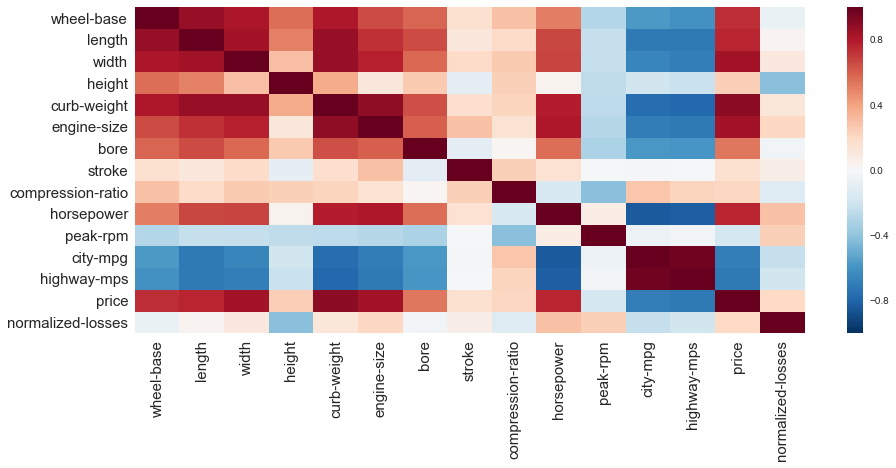

In [19]:
plt.figure(figsize=(15, 6))
sns.heatmap(corr_data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Categorical value analysis

In [9]:
categorical_columns = [col for col in DATA.columns if DATA[col].dtype == np.dtype('O')]   
print(len(categorical_columns))
print(categorical_columns)

10
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


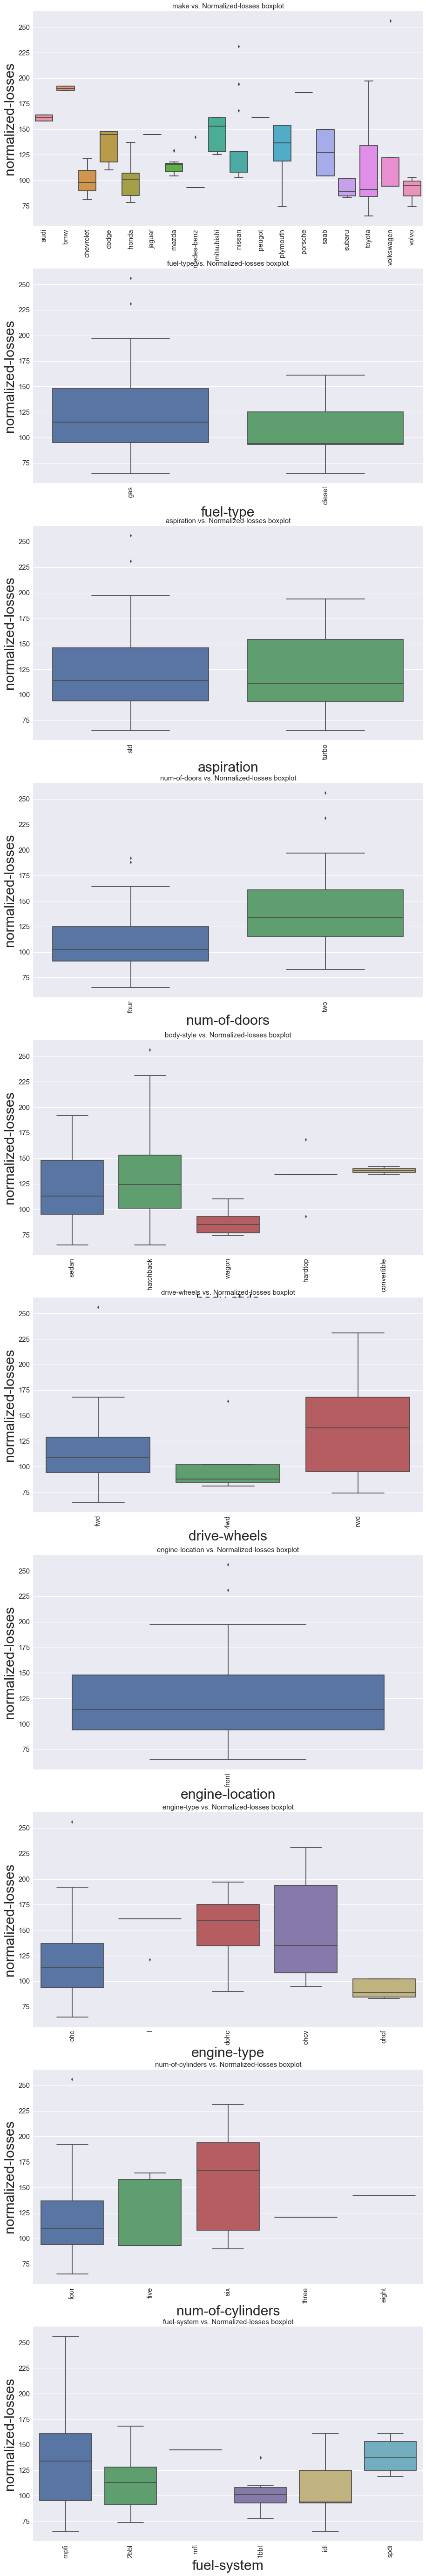

In [30]:
plt.figure(figsize=(15, 10*len(categorical_columns)))

for i in range(len(categorical_columns)):
    plt.subplot(len(categorical_columns), 1, i+1)
    sns.boxplot(DATA[categorical_columns[i]], DATA['normalized-losses'])
    plt.xlabel(categorical_columns[i], fontsize=30)
    plt.ylabel('normalized-losses', fontsize=30)
    plt.xticks(fontsize=15, rotation=90)
    plt.yticks(fontsize=15)
    plt.title('%s vs. Normalized-losses boxplot' % categorical_columns[i], fontsize=15)
    
plt.show()

### ANOVA test

In [32]:
categorical_columns

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [33]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
DATA_copy = DATA.copy()
DATA_copy.columns = [col.replace('-', '_') for col in DATA_copy.columns]

In [53]:
formula = 'normalized_losses ~ C(make)'
model = ols(formula, DATA_copy).fit()
print(model.summary())

aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     5.985
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           3.06e-10
Time:                        03:28:11   Log-Likelihood:                -754.89
No. Observations:                 160   AIC:                             1546.
Df Residuals:                     142   BIC:                             1601.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               